<a href="https://colab.research.google.com/github/sidgtx/projectx/blob/main/neuralnet/neuralpde/numerical_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

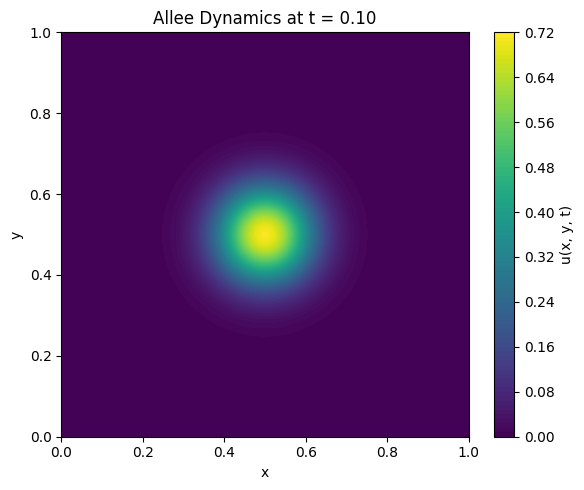

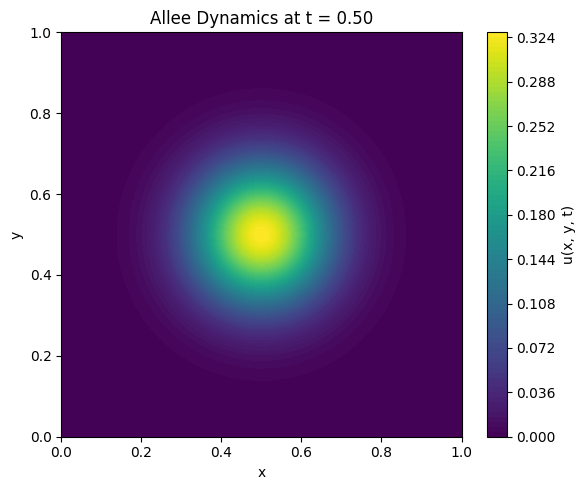

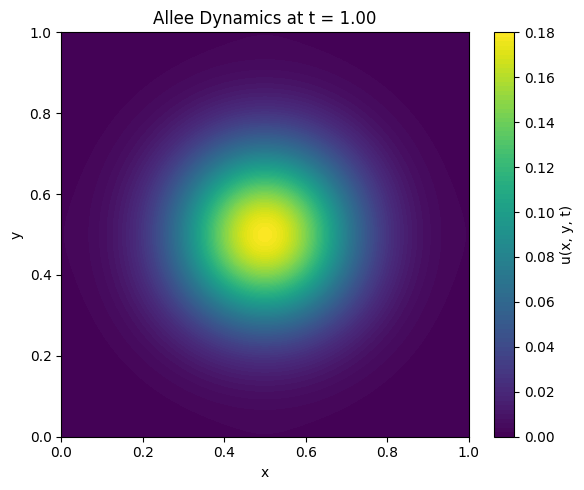

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Lx, Ly = 1.0, 1.0
Nx, Ny = 100, 100
dx, dy = Lx / Nx, Ly / Ny
dt = 0.001
T = 2.0
nt = int(T / dt)
D = 0.01
r = 1.0

# Grid
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Initial condition: bell shape in center
u = np.exp(-100 * ((X - 0.5) ** 2 + (Y - 0.5) ** 2))


# Function for time-dependent Allee threshold
def theta(t):
    return 0.3 + 0.1 * np.sin(2 * np.pi * t / T)


# Preallocate for visualization
u_list = []

# Time stepping loop (Euler explicit)
for n in range(nt):
    u_old = u.copy()
    laplacian = (
        np.roll(u_old, 1, axis=0)
        + np.roll(u_old, -1, axis=0)
        + np.roll(u_old, 1, axis=1)
        + np.roll(u_old, -1, axis=1)
        - 4 * u_old
    ) / dx**2

    th = theta(n * dt)
    reaction = r * u_old * (1 - u_old) * (u_old - th)
    u = u_old + dt * (D * laplacian + reaction)

    # Add snapshots at desired times
    if n in [int(0.1 / dt), int(0.5 / dt), int(1.0 / dt), int(2.0 / dt)]:
        u_list.append((n * dt, u.copy()))

# Plot the snapshots
for t_val, u_snapshot in u_list:
    plt.figure(figsize=(6, 5))
    plt.contourf(X, Y, u_snapshot, levels=100, cmap="viridis")
    plt.colorbar(label="u(x, y, t)")
    plt.title(f"Allee Dynamics at t = {t_val:.2f}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.tight_layout()
    plt.show()

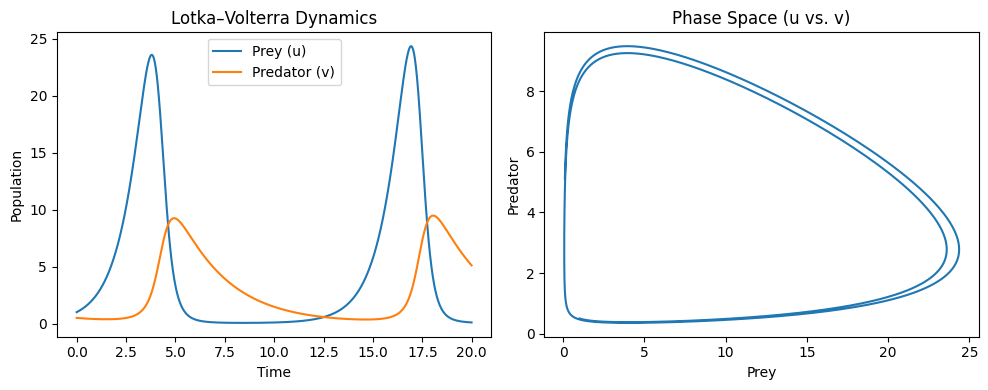

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 1.1  # Prey growth rate
beta = 0.4  # Predation rate
delta = 0.1  # Predator growth per consumed prey
gamma = 0.4  # Predator death rate

# Time grid
T = 20
dt = 0.01
t = np.arange(0, T, dt)

# Initialize
u = np.zeros_like(t)  # Prey
v = np.zeros_like(t)  # Predator
u[0] = 1.0
v[0] = 0.5

# Euler integration
for i in range(1, len(t)):
    u[i] = u[i - 1] + dt * (alpha * u[i - 1] - beta * u[i - 1] * v[i - 1])
    v[i] = v[i - 1] + dt * (delta * u[i - 1] * v[i - 1] - gamma * v[i - 1])

# Plotting
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, u, label="Prey (u)")
plt.plot(t, v, label="Predator (v)")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("Lotka–Volterra Dynamics")

plt.subplot(1, 2, 2)
plt.plot(u, v)
plt.xlabel("Prey")
plt.ylabel("Predator")
plt.title("Phase Space (u vs. v)")
plt.tight_layout()
plt.show()

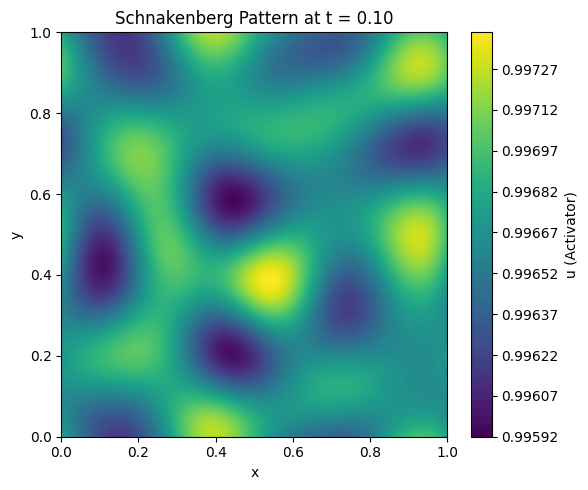

In [10]:
# Reaction–Diffusion System: Schnakenberg
Nx, Ny = 100, 100
dx = 1.0 / Nx
dt = 1e-5  # reduce time step
T = 0.2  # keep total time shorter to avoid long runs

nt = int(T / dt)

Du, Dv = 0.1, 1.0
a, b, gamma = 0.1, 0.9, 100.0

# Grid
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)

# Initial conditions
u = a + b + 0.01 * np.random.rand(Nx, Ny)
v = b / (a + b) ** 2 + 0.01 * np.random.rand(Nx, Ny)


# Storage for visualization
snapshots = []

# Simulation loop
for n in range(nt):
    u_old, v_old = u.copy(), v.copy()

    lap_u = (
        np.roll(u_old, 1, axis=0)
        + np.roll(u_old, -1, axis=0)
        + np.roll(u_old, 1, axis=1)
        + np.roll(u_old, -1, axis=1)
        - 4 * u_old
    ) / dx**2

    lap_v = (
        np.roll(v_old, 1, axis=0)
        + np.roll(v_old, -1, axis=0)
        + np.roll(v_old, 1, axis=1)
        + np.roll(v_old, -1, axis=1)
        - 4 * v_old
    ) / dx**2

    f = gamma * (a - u_old + u_old**2 * v_old)
    g = gamma * (b - u_old**2 * v_old)

    u += dt * (Du * lap_u + f)
    v += dt * (Dv * lap_v + g)

    if n in [int(0.1 / dt), int(0.2 / dt), int(0.5 / dt)]:
        snapshots.append((n * dt, u.copy()))

# Plot snapshots
# Plot snapshots
if snapshots:
    for t_snap, u_snap in snapshots:
        plt.figure(figsize=(6, 5))
        plt.contourf(X, Y, u_snap, levels=100, cmap="viridis")
        plt.colorbar(label="u (Activator)")
        plt.title(f"Schnakenberg Pattern at t = {t_snap:.2f}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.tight_layout()
        plt.show()
else:
    print("No snapshots to plot. Check time step and simulation stability.")

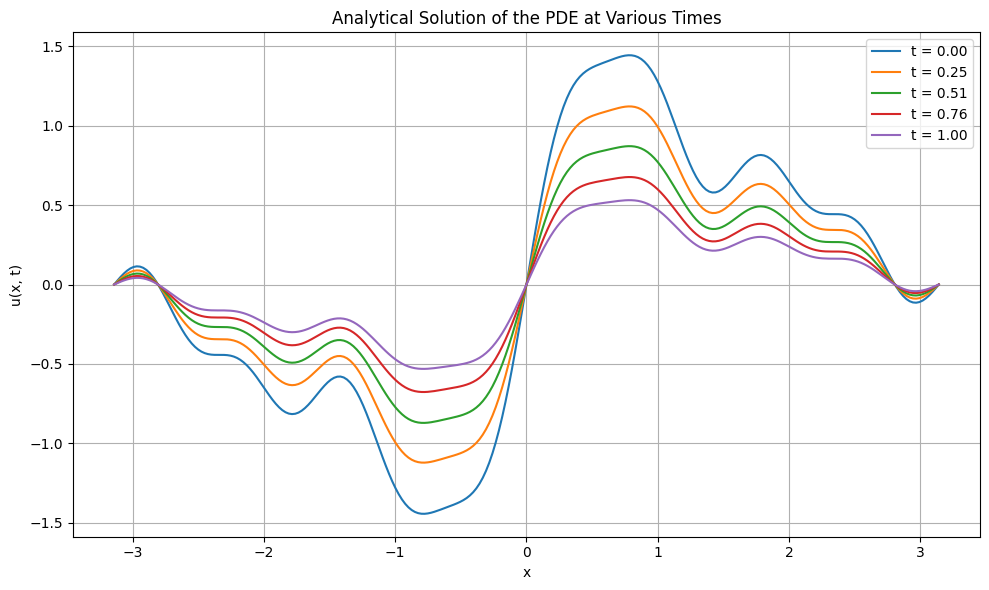

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Spatial and temporal domain
x = np.linspace(-np.pi, np.pi, 256)
t = np.linspace(0, 1, 100)
X, T = np.meshgrid(x, t)


# Analytical solution function (same as func)
def analytical_solution(x, t):
    return np.exp(-t) * (
        np.sin(x)
        + np.sin(2 * x) / 2
        + np.sin(3 * x) / 3
        + np.sin(4 * x) / 4
        + np.sin(8 * x) / 8
    )


# Evaluate
U = analytical_solution(X, T)

# Plot at different time slices
time_indices = [0, 25, 50, 75, 99]  # corresponds to t = 0.0, 0.25, ..., 1.0
plt.figure(figsize=(10, 6))
for idx in time_indices:
    plt.plot(x, U[idx], label=f"t = {t[idx]:.2f}")
plt.title("Analytical Solution of the PDE at Various Times")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

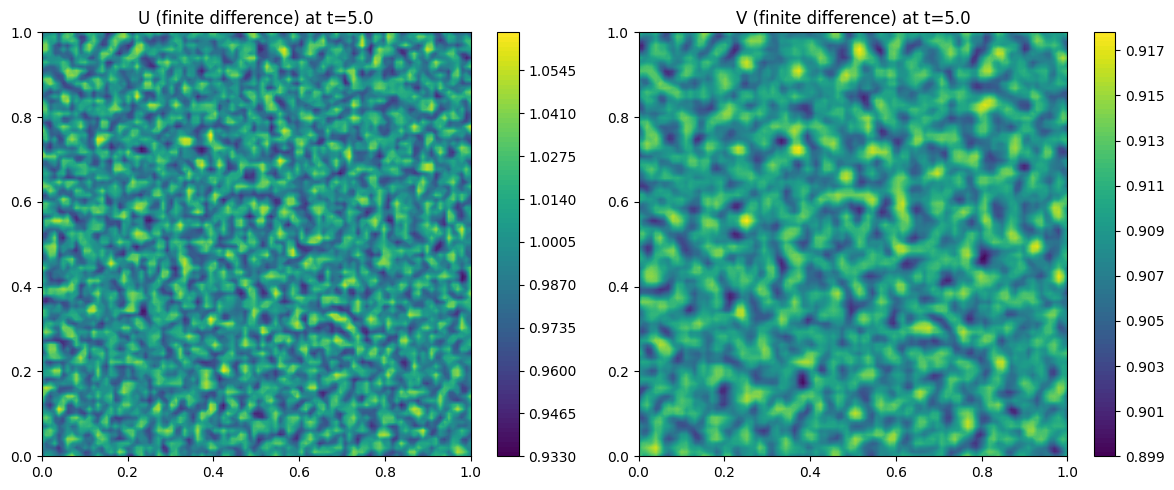

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Schnakenberg model parameters
Du = 1e-5
Dv = 1e-3
a = 0.1
b = 0.9
dx = dy = 1.0 / 100
dt = 1e-2
T = 5.0
steps = int(T / dt)

# Spatial grid
Nx = Ny = 100
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)

# Initialize u and v with perturbations
u = a + b + 0.01 * np.random.rand(Nx, Ny)
v = b / (a + b) ** 2 + 0.01 * np.random.rand(Nx, Ny)


# Helper function for Laplacian with Neumann (zero-flux) BCs
def laplacian(Z):
    Ztop = np.roll(Z, 1, axis=0)
    Zbottom = np.roll(Z, -1, axis=0)
    Zleft = np.roll(Z, 1, axis=1)
    Zright = np.roll(Z, -1, axis=1)
    return (Ztop + Zbottom + Zleft + Zright - 4 * Z) / dx**2


# Time stepping loop
for _ in range(steps):
    Lu = laplacian(u)
    Lv = laplacian(v)
    uv2 = u**2 * v
    u += dt * (Du * Lu + a - u + uv2)
    v += dt * (Dv * Lv + b - uv2)

# Plot final snapshot at t = 5.0
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("U (finite difference) at t=5.0")
plt.contourf(X, Y, u, levels=100, cmap="viridis")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("V (finite difference) at t=5.0")
plt.contourf(X, Y, v, levels=100, cmap="viridis")
plt.colorbar()
plt.tight_layout()
plt.show()